# Final Homework

> **Course:** Data Mining

> **Author:** Enes Kemal Ergin

> **Date:** 05/01/2017

Using Titanic Dataset from Kaggle: [link](https://www.kaggle.com/c/titanic/data)

About Dataset:

    VARIABLE DESCRIPTIONS:
    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)

    SPECIAL NOTES:
    Pclass is a proxy for socio-economic status (SES)
     1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in Years; Fractional if Age less than One (1)
     If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

    Other family relatives excluded from this study include cousins,
    nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
    only with a nanny, therefore parch=0 for them.  As well, some
    travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.
    
    
Questions we will answer:

- Which passenger class has the maximum number of survivors?
- What is the distribution, based on gender, of the survivors among the different classes?
- What is the distribution of the nonsurvivors among classes that have relatives aboard the ship?
- What is the survival percentage among different age groups?

### Which passenger class has the maximum number of survivors?

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.shape

(891, 12)

In [5]:
df['Pclass'].isnull().value_counts() # Check if there is null value

False    891
Name: Pclass, dtype: int64

In [7]:
df['Survived'].isnull().value_counts() # Check if there is null value

False    891
Name: Survived, dtype: int64

In [8]:
# Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [9]:
# Total Passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers
survivor_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

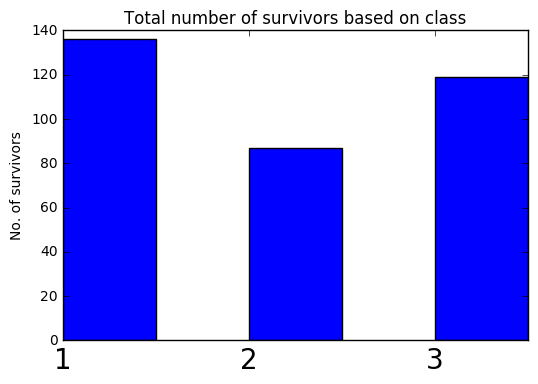

In [10]:
# Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

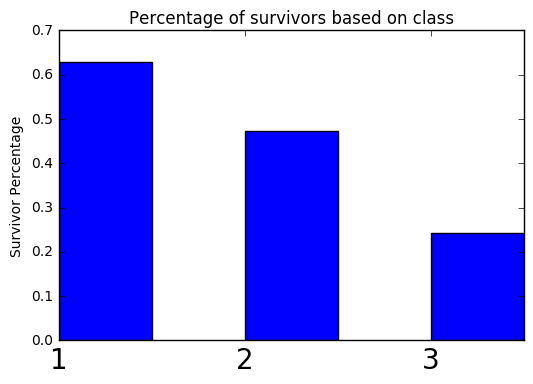

In [16]:
#Plotting the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(),
              survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

__These are our observations:__

- The maximum number of survivors are in the first and third class, respectively
- With respect to the total number of passengers in each class, first class has the maximum survivors at around 61%
- With respect to the total number of passengers in each class, third class has the minimum number of survivors at around 25%

__This is our key takeaway:__

- There was clearly a preference toward saving those from the first class as the
ship was drowning. It also had the maximum percentage of survivors

## What is the distribution of survivors based on gender among the various classes?

In [17]:
# Checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [19]:
# Male passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [20]:
# Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_total_passengers

Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64

In [21]:
male_survivor_percentage = male_survivors / male_total_passengers
male_survivor_percentage

Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64

In [22]:
# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [23]:
# Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()

In [24]:
female_survivor_percentage = female_survivors / female_total_passengers
female_survivor_percentage

Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64

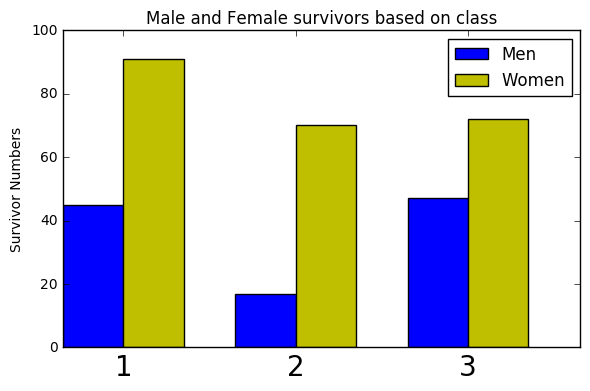

In [25]:
# Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue',label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

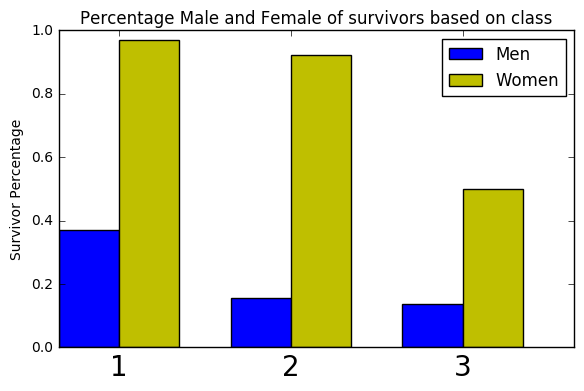

In [26]:
# Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

__These are our observations:__

- The majority of survivors are females in all the classes
- More than 90% of female passengers in first and second class survived
- The percentage of male passengers who survived in first and third class, respectively, are comparable 
__This is our key takeaway:__

- Female passengers were given preference for lifeboats and the majority were saved.

## What is the distribution of non survivors among the various classes who have family aboard the ship?

In [27]:
# Checking for the null values
df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [28]:
# Checking for the null values
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [29]:
# Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [30]:
# Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [31]:
non_survivor_percentage = non_survivors / total_passengers
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

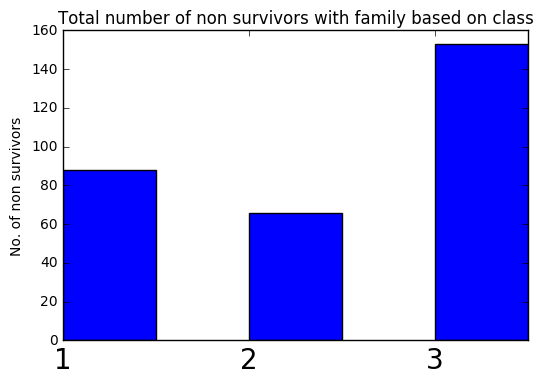

In [32]:
# Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

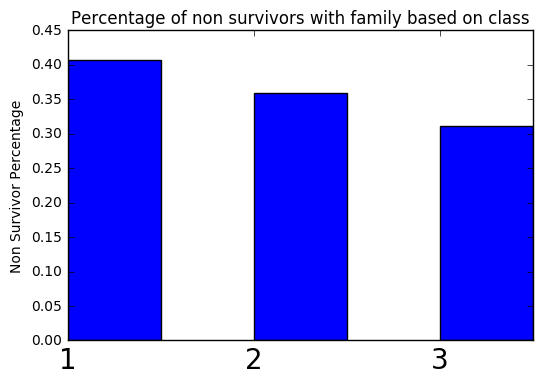

In [33]:
# Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

__These are our observations:__

- There are lot of nonsurvivors in the third class
- Second class has the least number of nonsurvivors with relatives
- With respect to the total number of passengers, the first class, who had relatives aboard, has the maximum nonsurvivor percentage and the third class has the least

__This is our key takeaway:__

- Even though third class has the highest number of nonsurvivors with relatives aboard, it primarily had passengers who did not have relatives on the ship, whereas in first class, most of the people had relatives aboard the ship.

## What was the survival percentage among different age groups?

In [34]:
# Checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [35]:
# Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]
# Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

In [42]:
d_temp = df[np.isfinite(df['Age'])]

In [43]:
# Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
survivors

AgeBin
(0, 18]       70
(18, 25]      54
(25, 40]     111
(40, 60]      50
(60, 100]      5
Name: Survived, dtype: int64

In [45]:
# Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')
total_passengers

AgeBin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: Survived, dtype: int64

In [50]:
list(total_passengers.index.values)

['(0, 18]', '(18, 25]', '(25, 40]', '(40, 60]', '(60, 100]']

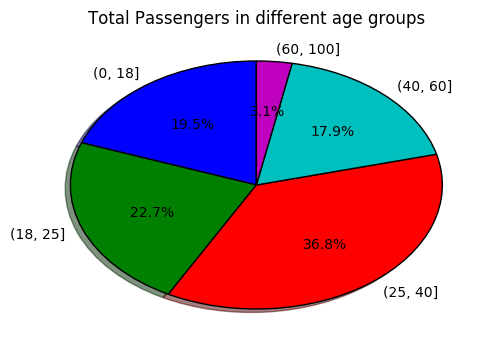

In [51]:
# Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=list(total_passengers.index.values),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

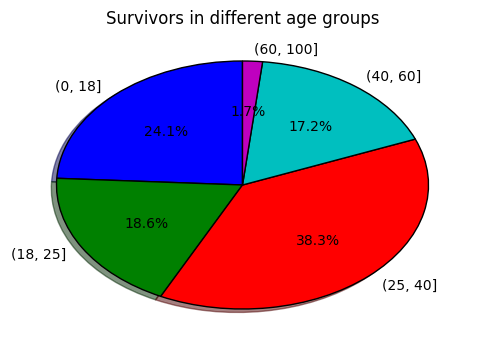

In [52]:
# Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=list(total_passengers.index.values), 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

__These are our observations:__

- The 25-40 age group has the maximum number of passengers, and 0-18 has the second highest number of passengers.
- Among the people who survived, the 18-25 age group has the second highest number of survivors
- The 60-100 age group has a lower proportion among the survivors

__This is our key takeaway:__

- The 25-40 age group had the maximum number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats.